#Tutorial 1

#CSC420 - Fall 2021

#Babak Taati

**numpy / PIL**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
I = Image.open("./images/CavePainting.jpg")
type(I)

PIL.JpegImagePlugin.JpegImageFile

In [6]:
im = np.array(I)
type(im)

numpy.ndarray

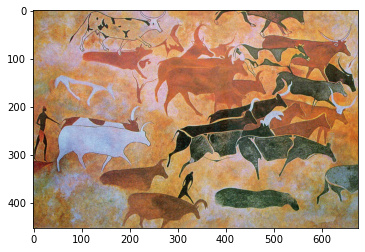

In [7]:
plt.imshow(im)

In [8]:
im.shape

(453, 676, 3)

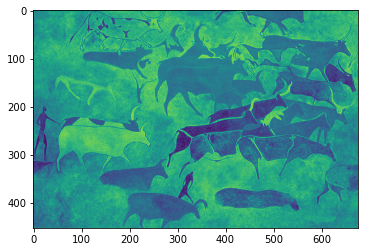

In [9]:
plt.imshow(im[:,:,1])
# what happened? 

(([], []), ([], []))

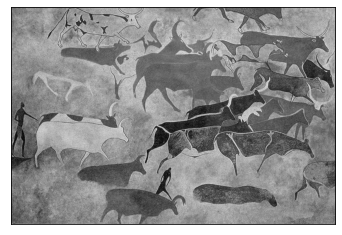

In [10]:
plt.imshow(im[:,:,1],cmap='gray')
plt.xticks([]), plt.yticks([])

(([], []), ([], []))

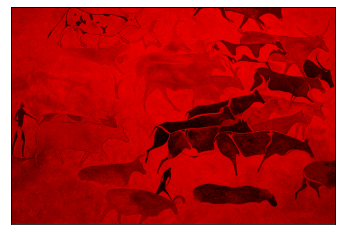

In [11]:
im_r = im.copy()
im_r[:,:,1:3]=0
plt.imshow(im_r)
plt.xticks([]), plt.yticks([])

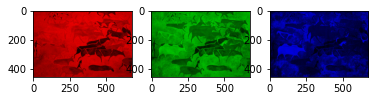

In [12]:
fig, ax = plt.subplots(1,3)
#fig.suptitle('RGB channels', fontsize=20)
for c in [0,1,2]:
    im_c = np.zeros(im.shape,dtype=int)
    im_c[:,:,c] = im[:,:,c]
    ax[c].imshow(im_c)

([], [])

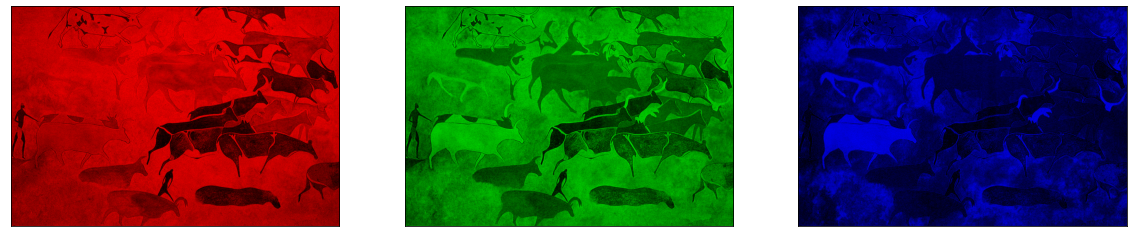

In [13]:
# larger figures
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

im_r = im.copy()
im_r[:,:,1:3]=0
ax1.imshow(im_r)
ax1.set_xticks([]), ax1.set_yticks([])

im_g = im.copy()
im_g[:,:,0]=0
im_g[:,:,2]=0
ax2.imshow(im_g)
ax2.set_xticks([]), ax2.set_yticks([])

im_b = im.copy()
im_b[:,:,0:2]=0
ax3.imshow(im_b)
ax3.set_xticks([]), ax3.set_yticks([])

(([], []), ([], []))

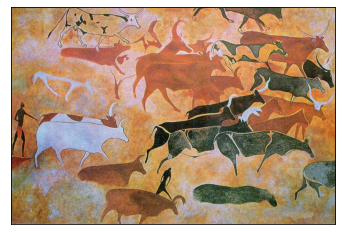

In [14]:
plt.imshow(im)
plt.xticks([]), plt.yticks([])

**OpenCV**

In [15]:
# install OpenCV
!pip install opencv-python
import cv2

In [16]:
# read an image (warning: if file or path doesn't exist you don't get an error msg)
img = cv2.imread('blahbla.jpg') 

In [17]:
type(img)

NoneType

In [18]:
# read an image (make sure CavePainting.jpg is in the main folder in your Google Drive)
img = cv2.imread('./images/CavePainting.jpg') # READS IN NUMPY ARRAY

In [19]:
whos

Variable   Type             Data/Info
-------------------------------------
I          JpegImageFile    <PIL.JpegImagePlugin.Jpeg<...>676x453 at 0x210BB1EA6D0>
Image      module           <module 'PIL.Image' from <...>packages\\PIL\\Image.py'>
ax         ndarray          3: 3 elems, type `object`, 24 bytes
ax1        AxesSubplot      AxesSubplot(0.125,0.407033;0.227941x0.190934)
ax2        AxesSubplot      AxesSubplot(0.398529,0.407033;0.227941x0.190934)
ax3        AxesSubplot      AxesSubplot(0.672059,0.407033;0.227941x0.190934)
c          int              2
cv2        module           <module 'cv2.cv2' from 'C<...>\cv2.cp38-win_amd64.pyd'>
fig        Figure           Figure(1440x1152)
im         ndarray          453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
im_b       ndarray          453x676x3: 918684 elems, type `uint8`, 918684 bytes (897.15234375 kb)
im_c       ndarray          453x676x3: 918684 elems, type `int32`, 3674736 bytes (3.5045013427734375 Mb)
im_

In [20]:
# not in colab
# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# display the image
h,w = img.shape[:2]
print(img.shape)
plt.imshow(img,cmap='gray')
plt.show()
# what happened?

In [ ]:
# BGR <--> RGB
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.xticks([]), plt.yticks([])

or: 


```
from google.colab.patches import cv2_imshow # replacement for cv2.imshow for colab  // meh ...
cv2_imshow(img)
```




In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')
plt.xticks([]), plt.yticks([])

In [ ]:
hist = cv2.calcHist([gray],[0],None,[256],[0,256])
plt.plot(hist)

In [ ]:
# histogram equalization 
equ = cv2.equalizeHist(gray)

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.imshow(equ, cmap='gray')

ax2 = fig.add_subplot(122)
hist = cv2.calcHist([equ],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist)
#plt.plot(hist, 'b.')

In [ ]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
hist = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256]) # make sure you put [img] not img
ax1.plot(hist), ax1.set_title('blue')
hist = cv2.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256]) # make sure you put [img] not img
ax2.plot(hist), ax2.set_title('green')
hist = cv2.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256]) # make sure you put [img] not img
ax3.plot(hist), ax3.set_title('red')

In [ ]:
# same thing, but colour-coded

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.imshow(img2)

ax2 = fig.add_subplot(122)
hist = cv2.calcHist([img],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='b')
hist = cv2.calcHist([img],channels=[1],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='g')
hist = cv2.calcHist([img],channels=[2],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='r')



In [ ]:
# histogram of an image mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[200:350,40:250] = 255 # around the white cow

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
masked_img = cv2.bitwise_and(img,img,mask=mask) # just for showing. we don't need this. 
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

ax2 = fig.add_subplot(122)
hist = cv2.calcHist([img],channels=[0],mask=mask,histSize=[256],ranges=[0,256])
plt.plot(hist, color='b')
hist = cv2.calcHist([img],channels=[1],mask=mask,histSize=[256],ranges=[0,256])
plt.plot(hist, color='g')
hist = cv2.calcHist([img],channels=[2],mask=mask,histSize=[256],ranges=[0,256])
plt.plot(hist, color='r')

In [ ]:
# histogram equalization of color image 
equ = img.copy()
# equ[:,:,0] = cv2.equalizeHist(equ[:,:,0]) 
equ[:,:,1] = cv2.equalizeHist(equ[:,:,1]) 
# equ[:,:,2] = cv2.equalizeHist(equ[:,:,2]) 

fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.imshow(cv2.cvtColor(equ, cv2.COLOR_BGR2RGB))
plt.axis('off')


ax2 = fig.add_subplot(122)
hist = cv2.calcHist([equ],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='b')
hist = cv2.calcHist([equ],channels=[1],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='g')
hist = cv2.calcHist([equ],channels=[2],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='r')


In [ ]:
# histogram equalization of color image, another way 
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) # convert to HSV colour space
hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2]) # histogram equalize the VALUE channel
equ = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
plt.imshow(equ)
plt.axis('off')


ax2 = fig.add_subplot(122)
hist = cv2.calcHist([equ],channels=[0],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='b')
hist = cv2.calcHist([equ],channels=[1],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='g')
hist = cv2.calcHist([equ],channels=[2],mask=None,histSize=[256],ranges=[0,256])
plt.plot(hist, color='r')

In [ ]:
# let's make a function
def imshowBGR2RGB( im ):
  img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.axis('off')
  return

In [ ]:
imshowBGR2RGB(img)

In [ ]:
# scaling 
rows, cols = img.shape[:2]
res = cv2.resize(img, (2*cols, 2*rows), interpolation = cv2.INTER_CUBIC) # or INTER_LINEAR
imshowBGR2RGB(res)
# what happened?

In [ ]:
# whos

In [ ]:
print(img.shape)
print(res.shape)

In [ ]:
# scaling 
res = cv2.resize(img,(400, 150), interpolation = cv2.INTER_AREA) # when reducing image size INTER_AREA can be faster
# note that in numpy arrays the first number is the # rows, in OpenCV it's the number of columns
imshowBGR2RGB(res)

In [ ]:
# flip
flip = cv2.flip(img, 0) # or 1
imshowBGR2RGB(flip)

In [ ]:
# rotate (centre, angle, scale)
M = cv2.getRotationMatrix2D((100, 120), -15, .7)
dst = cv2.warpAffine(img, M, (cols,rows))
imshowBGR2RGB(dst)

In [ ]:
# affine transformation
pts1 = np.float32([[5,5],[5,50],[50,5]])
pts2 = np.float32([[10,3],[20,30],[40,6]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

imshowBGR2RGB(dst)

In [ ]:
# perspective transformation

# getPerspectiveTransform

# how many point matches do we need?

In [ ]:
# averaging

kernel = np.ones((7,7),np.float32)/49
dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

In [ ]:
kernel

In [ ]:
# compare with the original
imshowBGR2RGB(img)

In [ ]:
# larger window
kernel = np.ones((15,15),np.float32)/225
dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

In [ ]:
# cv2.blur does the exact same thing
dst = cv2.blur(img,ksize=(15,15))
imshowBGR2RGB(dst)

In [ ]:
# Gaussian blur
kernel = cv2.getGaussianKernel(15, 5)

dst = cv2.filter2D(img,-1,kernel)

imshowBGR2RGB(dst)

# alternative: GaussianBlur(img,(15,15),20) 

In [ ]:
median = cv2.medianBlur(img, 7)
imshowBGR2RGB(median)

In [ ]:
# salt and pepper noise
noisy_img = img.copy() # what happens if we say noisy_img = img?
# salt
R = np.random.rand(img.shape[0], img.shape[1], img.shape[2]) > 0.70
noisy_img[R] = 255
# pepper
R = np.random.rand(img.shape[0], img.shape[1], img.shape[2]) > 0.70
noisy_img[R] = 0
imshowBGR2RGB(noisy_img)

In [ ]:
median = cv2.medianBlur(noisy_img, 7)
imshowBGR2RGB(median)

In [ ]:
G = cv2.GaussianBlur(noisy_img, (7,7), sigmaX=10)
imshowBGR2RGB(G)


In [ ]:
blur = cv2.bilateralFilter(img,30,40,75) 
imshowBGR2RGB(blur)

In [ ]:
blur = cv2.bilateralFilter(blur,30,15,75)
blur = cv2.bilateralFilter(blur,30,15,75)
blur = cv2.bilateralFilter(blur,30,15,75)
blur = cv2.bilateralFilter(blur,30,15,75) 
imshowBGR2RGB(blur)

**draw rectangle, circle, ...**

In [ ]:
img = np.zeros(shape=(1080,1920,3),dtype=np.int16)
plt.imshow(img)

In [ ]:
cv2.rectangle(img,pt1=(850,850),pt2=(950,1050),color=(255,255,100),thickness=-1);
plt.imshow(img)
# what's another way of doing this?

In [ ]:
img[80:130,30:400,:]=255
plt.imshow(img)

In [ ]:
cv2.circle(img, center=(850,550), radius=400, color=(50,150,255), thickness=30);
cv2.line(img,pt1=(1500,10),pt2=(80,900),color=(50, 200, 255),thickness=50)
cv2.rectangle(img,pt1=(200,300),pt2=(1800,650),color=(200,255,0),thickness=40);
plt.imshow(img)

In [ ]:
pts = np.array([[825, 20], 
                [800, 400], 
                [640, 500], 
                [440, 139], 
                [236, 300], 
                [30, 30]], 
               np.int32)
  
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img,[pts],isClosed=True,color=(255,255,0),thickness=5)
# also try fillPoly
plt.imshow(img)

In [ ]:
img = cv2.imread('/content/drive/My Drive/CavePainting.jpg') # READS IN NUMPY ARRAY
img2 = img.copy()
cv2.rectangle(img2,pt1=(40,200),pt2=(250,350),color=(100,0,0),thickness=10);
cv2.putText(img2,text='Cow',org=(80,180), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale= 2,color=(0,0,0),thickness=4)
imshowBGR2RGB(img2)

# Template Matching

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
white_cow = gray[200:350,40:250]

In [ ]:
fig = plt.figure(figsize=(20,16))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.imshow(gray, cmap='gray')
ax2.imshow(white_cow, cmap='gray')


In [ ]:
print(gray.shape)
print(white_cow.shape)

In [ ]:
result = cv2.matchTemplate(gray,white_cow,method=cv2.TM_CCOEFF) 
# other possible methods: https://docs.opencv.org/3.4/de/da9/tutorial_template_matching.html
plt.imshow(result,cmap='gray')

In [ ]:
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
img_display = gray.copy()
cv2.rectangle(img_display, maxLoc, (maxLoc[0] + white_cow.shape[1], maxLoc[1] + white_cow.shape[0]), color=(0,0,0), thickness=5)
plt.imshow(img_display,cmap='gray')
plt.axis('off')

In [ ]:
# let's try another method
result = cv2.matchTemplate(gray,white_cow,method=cv2.TM_CCORR) # cross correlation
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
img_display = gray.copy()
cv2.rectangle(img_display, maxLoc, (maxLoc[0] + white_cow.shape[1], maxLoc[1] + white_cow.shape[0]), color=(0,0,0), thickness=5)
plt.imshow(img_display,cmap='gray')
plt.axis('off')

# can you explain why?